In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head(3)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [6]:
df['DRK_YN'] = df['DRK_YN'].replace({'Y':1,'N':0})

In [7]:
df['sex'] = df['sex'].replace({'Male':1,'Female':0})

In [8]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [9]:
# Veri setinin %10'unu rastgele seçme
df = df.sample(frac=0.1, random_state=16)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
X = df.drop("DRK_YN", axis=1)  # Özellikler
y = df['DRK_YN']  # Hedef değişken

In [12]:
kf = KFold(n_splits=10, shuffle=True, random_state=16)

In [13]:
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]

In [15]:
accuracy_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
roc_auc_scores_knn = []

In [16]:
accuracy_scores_knn.append(accuracy_score(y_test, y_pred))
precision_scores_knn.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_knn.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_knn.append(roc_auc_score(y_test, y_proba))

In [17]:
# Ortalamaları hesaplama
accuracy_mean = np.mean(accuracy_scores_knn)
precision_mean = np.mean(precision_scores_knn)
recall_mean = np.mean(recall_scores_knn)
roc_auc_mean = np.mean(roc_auc_scores_knn)

# Sonuçları yazdırma
print("10-Fold Cross-Validation ile KNN Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile KNN Modeli Performansı:
Ortalama Accuracy: 0.6485423181680622
Ortalama Precision: 0.6399685904986259
Ortalama Recall: 0.6639511201629328
Ortalama ROC AUC: 0.6843751183098694


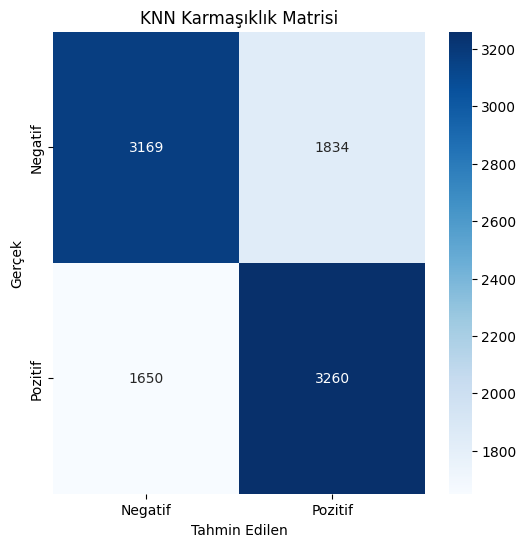

In [18]:
# Karmaşıklık Matrisi'ni hesaplama
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık Matrisi'ni görselleştirme
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('KNN Karmaşıklık Matrisi')
plt.show()

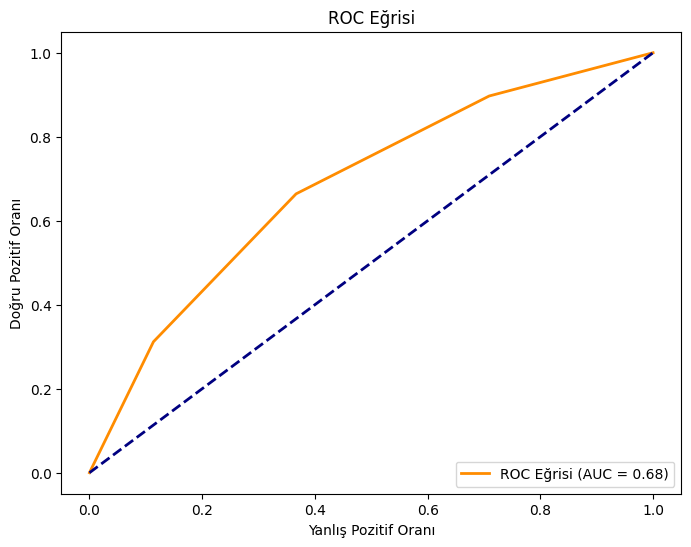

In [19]:
# ROC eğrisi görselleştirme
fpr, tpr, _ = roc_curve(y_test, y_proba)  # FPR ve TPR hesaplama
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')  # ROC çizme
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [20]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("KNN Root Mean Squared Error (RMSE):", rmse)

KNN Root Mean Squared Error (RMSE): 0.592838664251867


In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]

In [22]:
accuracy_scores_nb = []
precision_scores_nb = []
recall_scores_nb = []
roc_auc_scores_nb = []

In [23]:
accuracy_scores_nb.append(accuracy_score(y_test, y_pred))
precision_scores_nb.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_nb.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_nb.append(roc_auc_score(y_test, y_proba))

In [24]:
accuracy_mean = np.mean(accuracy_scores_nb)
precision_mean = np.mean(precision_scores_nb)
recall_mean = np.mean(recall_scores_nb)
roc_auc_mean = np.mean(roc_auc_scores_nb)

print("10-Fold Cross-Validation ile Gaussian Naive Bayes Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile Gaussian Naive Bayes Modeli Performansı:
Ortalama Accuracy: 0.6867749419953596
Ortalama Precision: 0.6825075834175935
Ortalama Recall: 0.6873727087576375
Ortalama ROC AUC: 0.7384487637356486


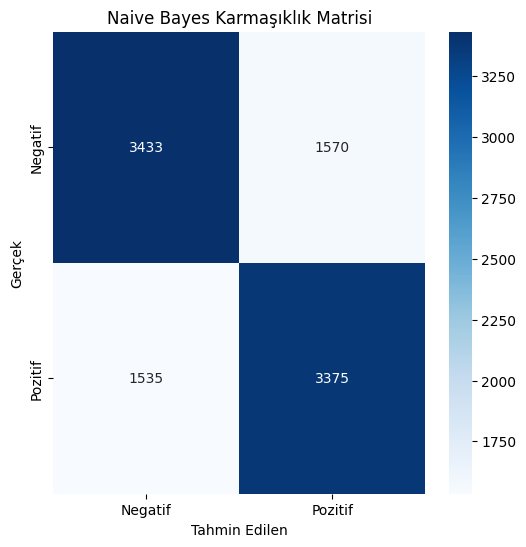

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Naive Bayes Karmaşıklık Matrisi')
plt.show()

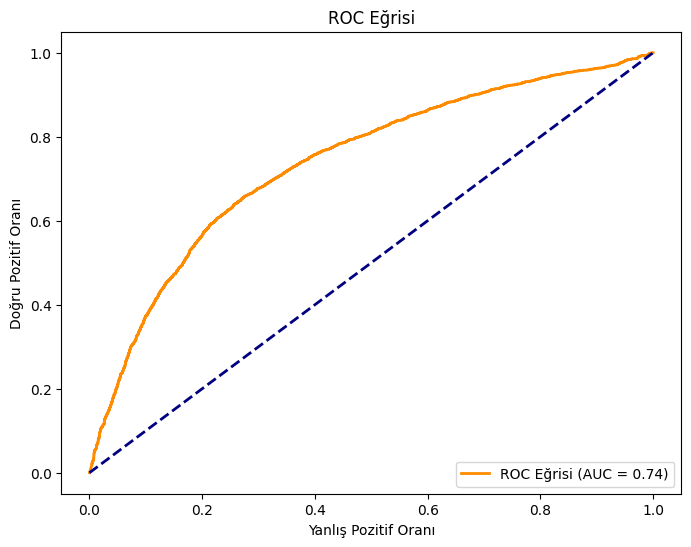

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [27]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("Naive Bayes Root Mean Squared Error (RMSE):", rmse)

Naive Bayes Root Mean Squared Error (RMSE): 0.5596651302382885


In [28]:
lsvm_model = SVC(probability=True)
lsvm_model.fit(X_train, y_train)
y_pred = lsvm_model.predict(X_test)
y_proba = lsvm_model.predict_proba(X_test)[:, 1]

In [29]:
accuracy_scores_lsvm = []
precision_scores_lsvm = []
recall_scores_lsvm = []
roc_auc_scores_lsvm = []

In [30]:
accuracy_scores_lsvm.append(accuracy_score(y_test, y_pred))
precision_scores_lsvm.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_lsvm.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_lsvm.append(roc_auc_score(y_test, y_proba))

In [31]:
accuracy_mean = np.mean(accuracy_scores_lsvm)
precision_mean = np.mean(precision_scores_lsvm)
recall_mean = np.mean(recall_scores_lsvm)
roc_auc_mean = np.mean(roc_auc_scores_lsvm)

print("10-Fold Cross-Validation ile LSVM Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile LSVM Modeli Performansı:
Ortalama Accuracy: 0.7220821143952386
Ortalama Precision: 0.7249008557712378
Ortalama Recall: 0.7073319755600814
Ortalama ROC AUC: 0.7960784832562785


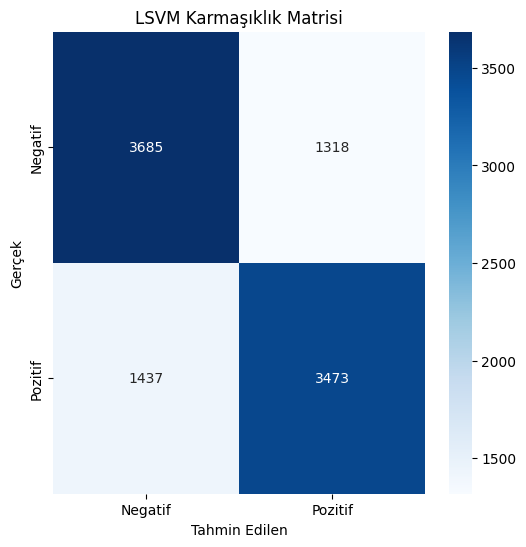

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('LSVM Karmaşıklık Matrisi')
plt.show()

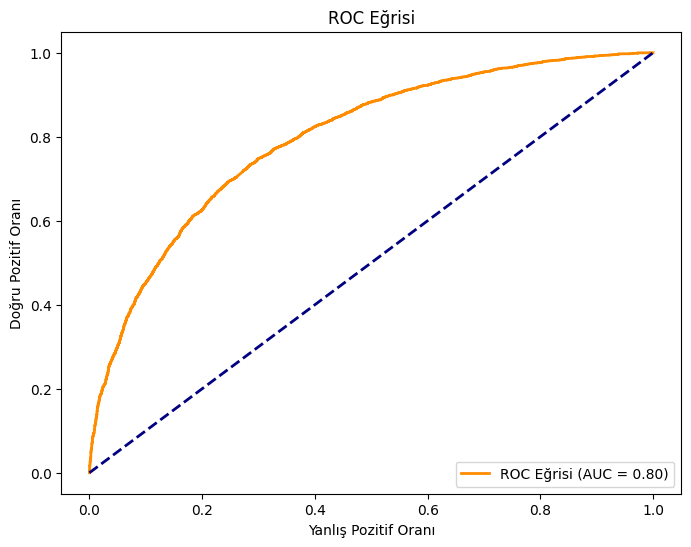

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [34]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("LSVM Root Mean Squared Error (RMSE):", rmse)

LSVM Root Mean Squared Error (RMSE): 0.5271791778937797


In [57]:
svm_rbf = SVC(kernel='rbf',probability=True)  # RBF kernel kullanarak SVC
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
y_proba = svm_rbf.predict_proba(X_test)[:, 1]

In [58]:
accuracy_scores_rbf = []
precision_scores_rbf = []
recall_scores_rbf= []
roc_auc_scores_rbf = []

In [59]:
accuracy_scores_rbf.append(accuracy_score(y_test, y_pred))
precision_scores_rbf.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_rbf.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_rbf.append(roc_auc_score(y_test, y_proba))

In [60]:
accuracy_mean = np.mean(accuracy_scores_rbf)
precision_mean = np.mean(precision_scores_rbf)
recall_mean = np.mean(recall_scores_rbf)
roc_auc_mean = np.mean(roc_auc_scores_rbf)

print("10-Fold Cross-Validation ile RBF SVM Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile RBF SVM Modeli Performansı:
Ortalama Accuracy: 0.7220821143952386
Ortalama Precision: 0.7249008557712378
Ortalama Recall: 0.7073319755600814
Ortalama ROC AUC: 0.796081047908933


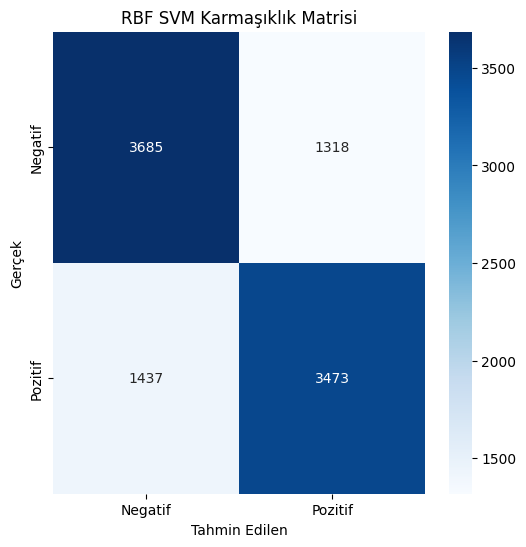

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('RBF SVM Karmaşıklık Matrisi')
plt.show()

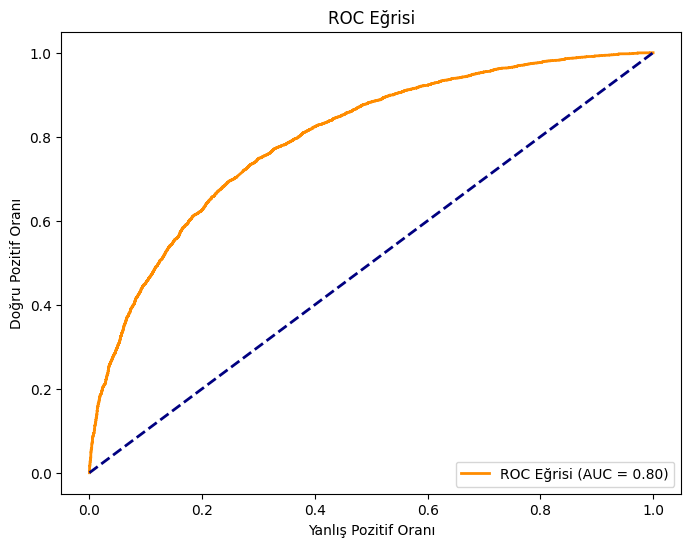

In [62]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [63]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.5271791778937797


In [36]:
rf_model = RandomForestClassifier(random_state=16)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [37]:
accuracy_scores_rf = []
precision_scores_rf = []
recall_scores_rf= []
roc_auc_scores_rf = []

In [38]:
accuracy_scores_rf.append(accuracy_score(y_test, y_pred))
precision_scores_rf.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_rf.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_rf.append(roc_auc_score(y_test, y_proba))

In [39]:
accuracy_mean = np.mean(accuracy_scores_rf)
precision_mean = np.mean(precision_scores_rf)
recall_mean = np.mean(recall_scores_rf)
roc_auc_mean = np.mean(roc_auc_scores_rf)

print("10-Fold Cross-Validation ile Random Forest Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile Random Forest Modeli Performansı:
Ortalama Accuracy: 0.7236961565620902
Ortalama Precision: 0.7231243576567318
Ortalama Recall: 0.7164969450101834
Ortalama ROC AUC: 0.8014928720975154


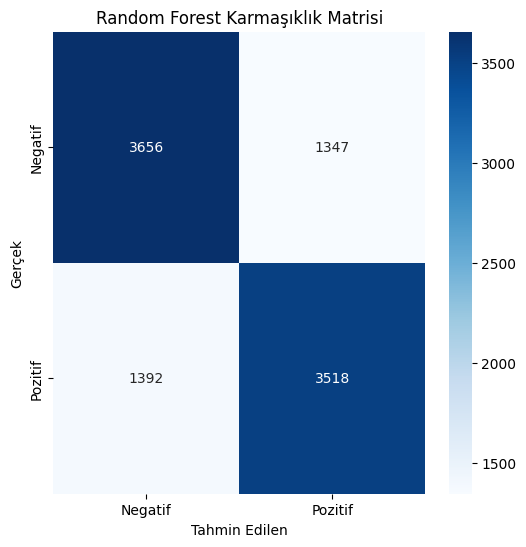

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Random Forest Karmaşıklık Matrisi')
plt.show()

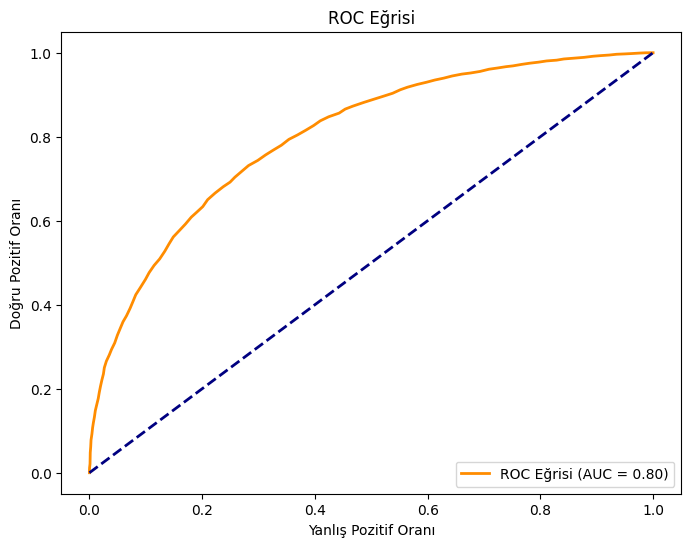

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [42]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.5256461199684725


In [43]:
mlp_model = MLPClassifier(random_state=16)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
y_proba = mlp_model.predict_proba(X_test)[:, 1]

In [44]:
accuracy_scores_mlp = []
precision_scores_mlp = []
recall_scores_mlp= []
roc_auc_scores_mlp = []

In [45]:
accuracy_scores_mlp.append(accuracy_score(y_test, y_pred))
precision_scores_mlp.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_mlp.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_mlp.append(roc_auc_score(y_test, y_proba))

In [46]:
accuracy_mean = np.mean(accuracy_scores_mlp)
precision_mean = np.mean(precision_scores_mlp)
recall_mean = np.mean(recall_scores_mlp)
roc_auc_mean = np.mean(roc_auc_scores_mlp)

print("10-Fold Cross-Validation ile MLP Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile MLP Modeli Performansı:
Ortalama Accuracy: 0.7170382326238273
Ortalama Precision: 0.7813418871959369
Ortalama Recall: 0.595315682281059
Ortalama ROC AUC: 0.8096629191527852


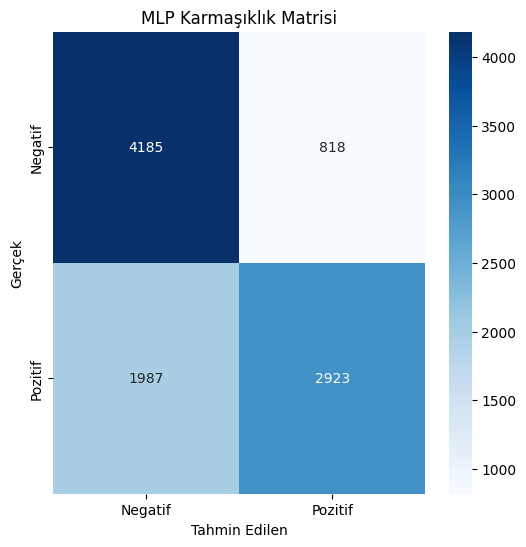

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('MLP Karmaşıklık Matrisi')
plt.show()

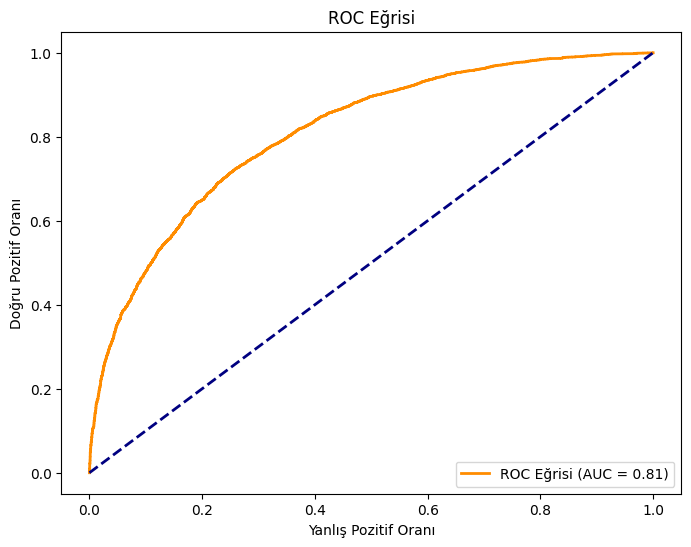

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [49]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.5319415074763133


In [50]:
xgb_model = XGBClassifier(random_state=16)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [51]:
accuracy_scores_xgboost = []
precision_scores_xgboost = []
recall_scores_xgboost = []
roc_auc_scores_xgboost = []

In [52]:
accuracy_scores_xgboost.append(accuracy_score(y_test, y_pred))
precision_scores_xgboost.append(precision_score(y_test, y_pred, zero_division=1))
recall_scores_xgboost.append(recall_score(y_test, y_pred, zero_division=1))
roc_auc_scores_xgboost.append(roc_auc_score(y_test, y_proba))

In [53]:
accuracy_mean = np.mean(accuracy_scores_xgboost)
precision_mean = np.mean(precision_scores_xgboost)
recall_mean = np.mean(recall_scores_xgboost)
roc_auc_mean = np.mean(roc_auc_scores_xgboost)

print("10-Fold Cross-Validation ile XGBoost Modeli Performansı:")
print("Ortalama Accuracy:", accuracy_mean)
print("Ortalama Precision:", precision_mean)
print("Ortalama Recall:", recall_mean)
print("Ortalama ROC AUC:", roc_auc_mean)

10-Fold Cross-Validation ile XGBoost Modeli Performansı:
Ortalama Accuracy: 0.7320690003026329
Ortalama Precision: 0.7307534807534808
Ortalama Recall: 0.7268839103869654
Ortalama ROC AUC: 0.8094053954592622


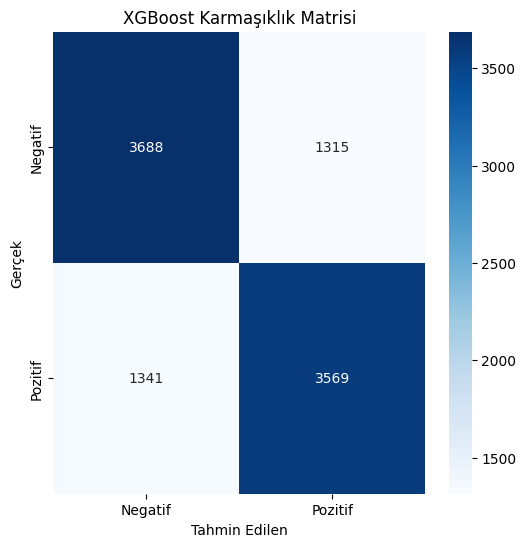

In [54]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('XGBoost Karmaşıklık Matrisi')
plt.show()

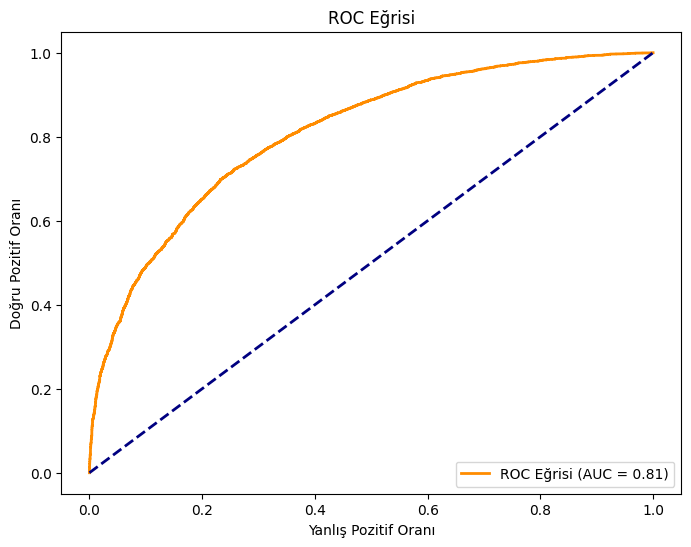

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc_mean:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()

In [56]:
# RMSE hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE için karekök alıyoruz

# RMSE'yi yazdırma
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.5176205170753639
